# 1. ARIMA 모델 Review
Let 
$$Y_t=\nabla^dX_t=(1-B)^dX_t $$
then,
$$Y_t \ = \ (\phi_1Y_{t-1}+ \dots + \phi_pY_{t-p}) +(Z_t+  \theta_1Z_{t-1}+ \dots + \theta_qZ_{t-q})$$
can be written as
$$\theta(B)Z_t=\phi(B)Y_t$$
where
$$\theta(B)=1+\theta_1B+ \dots +\theta_qB^q$$ 
$$ \phi(B)=1-\phi_1B-\phi_2B^2- \dots -\phi_pB^p $$


# 2. SARIMA 모델
- Seasonal ARIMA model
- 주기적 계절성을 가지는 데이터
  - 1년 주기 계절성의 경우 $X_t$는 $X_{t-12}$, $X_{t-24}, \dots$의 영향을 받음 
  

## Pure Seasonal ARMA 모델
- $P$ : order of p
- $Q$ : order of q
- $s$ : seasonal value
<br>

**[ $ARMA(P,Q)_s$ ]**
$$\Phi_P(B^s)X_t=\Theta_Q(B^s)Z_t$$
where
$$\Phi_P(B^s)=1-\Phi_1B^{1s}-\Phi_2B^{2s}- \dots -\Phi_PB^{Ps}$$
$$\Theta_Q(B^s)=1+\Theta_1B^{1s}+\Theta_2B^{2s}+\dots +\Theta_QB^{Qs}$$

**[ Example 1 ]** 
- $ARMA(1,0)_{12}$
$$(1-\Phi_1B^{12})X_t=Z_t$$
$$X_t=\Phi_1X_{t-12}+Z_t$$
<br>

**[ Example 2 ]** 
- $ARMA(2,1)_{12}$
$$(1-\Phi_1B^{12}-\Phi_2B^{24})X_t=(1+\Theta_1B^{12})Z_t$$
$$X_t=\Phi_1X_{t-12}+\Phi_2X_{t-24}+Z_t+\Theta_1Z_{t-12}$$

## SARIMA process
- $p$ : order of non-seasonal AR term
- $d$ : order of non-seasonal differencing
- $q$ : order of non-seasonal MA term
- $P$ : order of seasonal AR(i.e. SAR) term
- $D$ : order of seasonal differencing (i.e. power of $(1-B^s)^D$)
- $Q$ : order of seasonal MA (i.e. SMA) term
<br>

$SARIMA(p,d,q,P,D,Q)_s$ has the form
$$\Phi_P(B^s)\phi_p(B)(1-B^s)^D(1-B)^dX_t=\Theta_Q(B^s)\theta_q(B)Z_t$$
where
$$\theta_q(B)=1+\theta_1B+\theta_2B^2\dots +\theta_qB^q$$
$$\Theta_Q(B^s)=1+\Theta_1B^{1s}+\Theta_2B^{2s}+\dots +\Theta_QB^{Qs}$$
$$\text{and}$$
$$\phi_p(B)=1-\phi_1B-\phi_2B^2-\dots -\phi_pB^p$$
$$\Phi_P(B^s)=1=\Phi_1B^{1s}-\Phi_2B^{2s}-\dots -\Phi_PB^{Ps}$$
<br>

**[ Example 1 ]** <br>
$SARIMA(1,0,0,1,0,1)_{12}$
$$(1-\phi_1B)(1-\Phi_1B^{12})X_t=(1+\Theta_1B^{12})Z_t$$
$$(1-\phi_1B-\Phi_1B^{12}+\phi_1\Phi_1B^{13})X_t=Z_t+\Theta_1Z_{t-12}$$
$$X_t=\phi_1X_{t-1}+\Phi_1X_{t-12}-\phi_1\Phi_1X_{t-13}+Z_t+\Theta_1Z_{t-12}$$


# 3. ACF of SARIMA processes

## 시뮬레이션
- $SARIMA(0,0,1,0,0,1)_{12}$ 
- $\theta_1=0.7$ and $\Theta_1=0.6$, then
$$X_t=Z_t+0.7Z_{t-1}+0.6Z_{t-12}+0.42Z_{t-13}$$

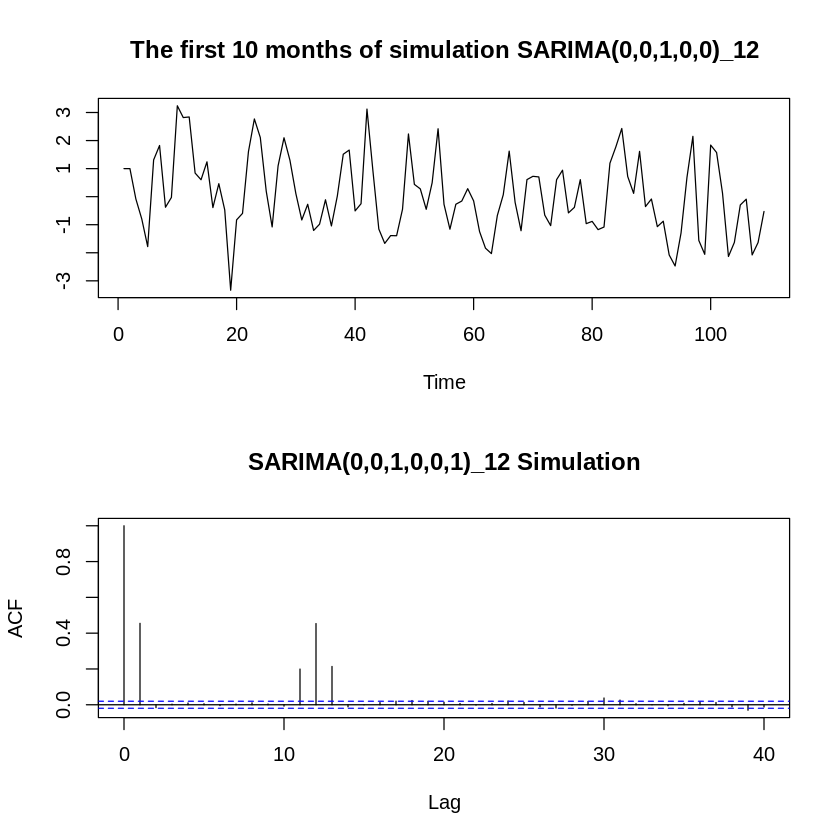

In [1]:
x=NULL
z=NULL
n=10000

z=rnorm(n)
x[1:13]=1

for(i in 14:n){
  x[i]<-z[i]+0.7*z[i-1]+0.6*z[i-12]+0.42*z[i-13]
}

par(mfrow=c(2,1))
plot.ts(x[12:120], main='The first 10 months of simulation SARIMA(0,0,1,0,0)_12', ylab='') 

acf(x, main='SARIMA(0,0,1,0,0,1)_12 Simulation')

=> time series 플롯에서도 계정성이 보이는 듯하고, ACF는 lag=11에서 다시 상승 (seasonality 때문)

## Autocovariance function: $\gamma(k)$
$\gamma(0)=Cov(X_t,X_t)=Var(X_t)$ <br>
$X_t=Z_t+\theta_1Z_{t-1}+\Theta_1Z_{t-12}+\theta_1\Theta_1Z_{t-13}$ <br>
$Var(X_t)=\sigma_Z^2+\theta_1^2\sigma_Z^2+\Theta_1^2\sigma_Z^2+\theta_1^2\Theta_1^2\sigma_Z^2$ <br>
=> thus, $\gamma(0)=(1+\theta_1^2)(1+\Theta_1^2)\sigma_Z^2$
<br>


---


$\gamma(1)=Cov(X_t,X_{t-1})$ <br>
$X_t=Z_t+\theta_1Z_{t-1}+\Theta_1Z_{t-12}+\theta_1\Theta_1Z_{t-13}$ <br>
$X_{t-1}=Z_{t-1}+\theta_1Z_{t-2}+\Theta_1Z_{t-13}+\theta_1\Theta_1Z_{t-14}$ <br>
→ iid 독립을 가정하므로, $X_t$와 $X_{t-1}$에서 공통된 항 $Z_{t-1}, Z_{t-13}$만 combine 후 계산
$\gamma(1)=Cov(\theta_1Z_{t-1}+\theta_1\Theta_1Z_{t-13}, Z_{t-1}+\Theta_1Z_{t-13})=\theta_1\sigma_Z^2+\theta_1\Theta_1^2\sigma_Z^2$ <br>
$\gamma(1)=\theta_1(1+\Theta_1^2)\sigma_Z^2$
<br> 


---


### ACF: $\rho(1)$
$$\rho(1)=\frac{\gamma(1)}{\gamma(0)}=\frac{\theta_1(1+\Theta_1^2)\sigma_Z^2}{(1+\theta_1^2)(1+\Theta_1^2)\sigma_Z^2}=\frac{\theta_1}{1+\theta_1^2} \leq \frac{1}{2}$$
since $(\theta_1-1)^2 \geq 0$



$\gamma(11)=Cov(X_t,X_{t-11})$ <br>
$X_t=Z_t+\theta_1Z_{t-1}+\Theta_1Z_{t-12}+\theta_1\Theta_1Z_{t-13}$ <br>
$X_{t-11}=Z_{t-11}+\theta_1Z_{t-12}+\Theta_1Z_{t-23}+\theta_1\Theta_1Z_{t-24}$ <br>
→ iid 독립을 가정하므로, $X_t$와 $X_{t-11}$에서 공통된 항 $Z_{t-12}$만 combine 후 계산
$\gamma(11)=Cov(\Theta_1Z_{t-12}, \theta_1Z_{t-12})=\theta_1\Theta_1\sigma_Z^2$ <br>
<br> 


---


### ACF: $\rho(11)$
$$\rho(11)=\frac{\gamma(11)}{\gamma(0)}=\frac{\theta_1\Theta_1\sigma_Z^2}{(1+\theta_1^2)(1+\Theta_1^2)\sigma_Z^2}=\frac{\theta_1\Theta_1}{(1+\theta_1^2)(1+\Theta_1^2)} \neq 0$$
But $0<\rho(11) \leq \frac{1}{4}$


# Johnson&Johnson 데이터셋에 적용

## Modeling
- 시계열 시각화 (time plot)
- transformation
- 차분 (seasonal or non-seasonal)
- Lung-Box test - if there is autocorrelation with previous lags
- ACF 
  - 초기 스파이크 → MA order
  - seasonal lag 주변 스파이크 → SMA order
- PACF
  - 초기 스파이크 → AR order
  - seasonal lag 주변 스파이크 → SAR order
- 여러개 모델 fit 해보기
- AIC 비교해서 최적 모델 찾기 (**parsimony principle**)
- Time plot, ACF and 잔차의 PACF
- 잔차에 Ljung-Box test

### The parsimony principle
$SARIMA(p,d,q,P,D,Q)_s$ 에서 $p+d+q+P+D+Q \leq 6$

In [9]:
install.packages('astsa')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
require(astsa)

Loading required package: astsa



In [12]:
help(jj) # Johnson and Johnson quarterly earnings per share

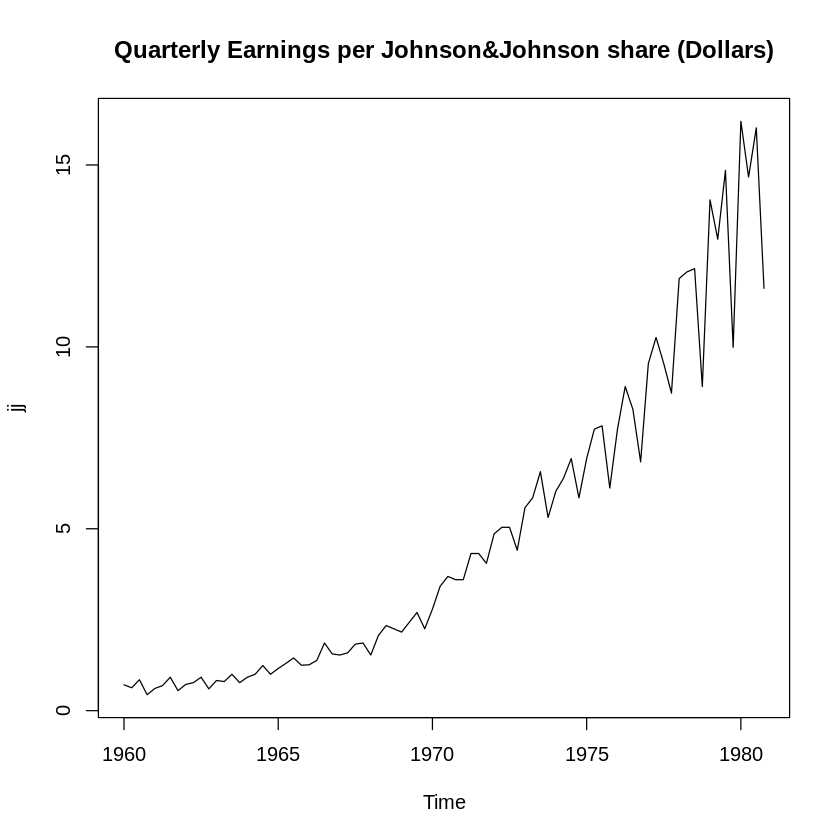

In [14]:
# Time plot
plot(jj, main='Quarterly Earnings per Johnson&Johnson share (Dollars)')

**Log-return** <br>
$r_t=\text{log}(\frac{X_t}{X_{t-1}})= \text{log}(X_t)-\text{log}(X_{t-1})$ <br>
R 코드 : ```diff(log())```


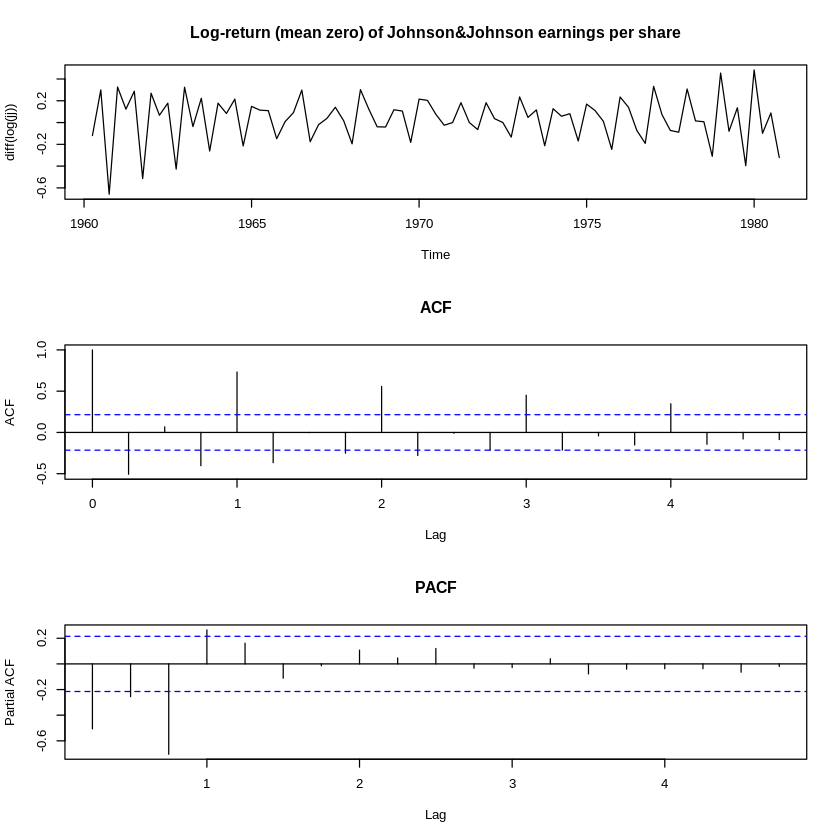

In [15]:
# Transformation
par(mfcol=c(3,1))
plot(diff(log(jj)), main='Log-return (mean zero) of Johnson&Johnson earnings per share')
acf(diff(log(jj)), main='ACF')
acf(diff(log(jj)), type='partial', main='PACF')

=> 계절성 때문에 ACF에서 lag 4마다 강한 correlation이 나타남

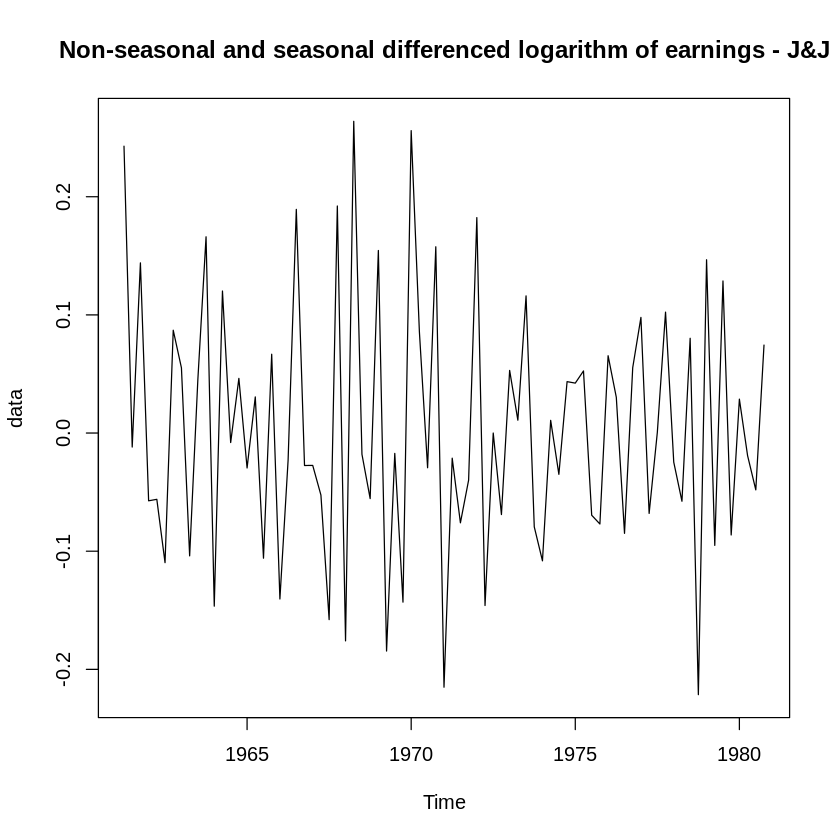

In [19]:
# Seasonal differencing D=1
data <- diff(diff(log(jj)),4)
plot(data, main='Non-seasonal and seasonal differenced logarithm of earnings - J&J')

In [20]:
# Ljung-Box test
Box.test(data, lag=log(length(data)))


	Box-Pierce test

data:  data
X-squared = 20.95, df = 4.3694, p-value = 0.0004658


=> p-value가 매우 작음 : 앞선 lag와 자기상관성이 없다는 귀무가설 기각

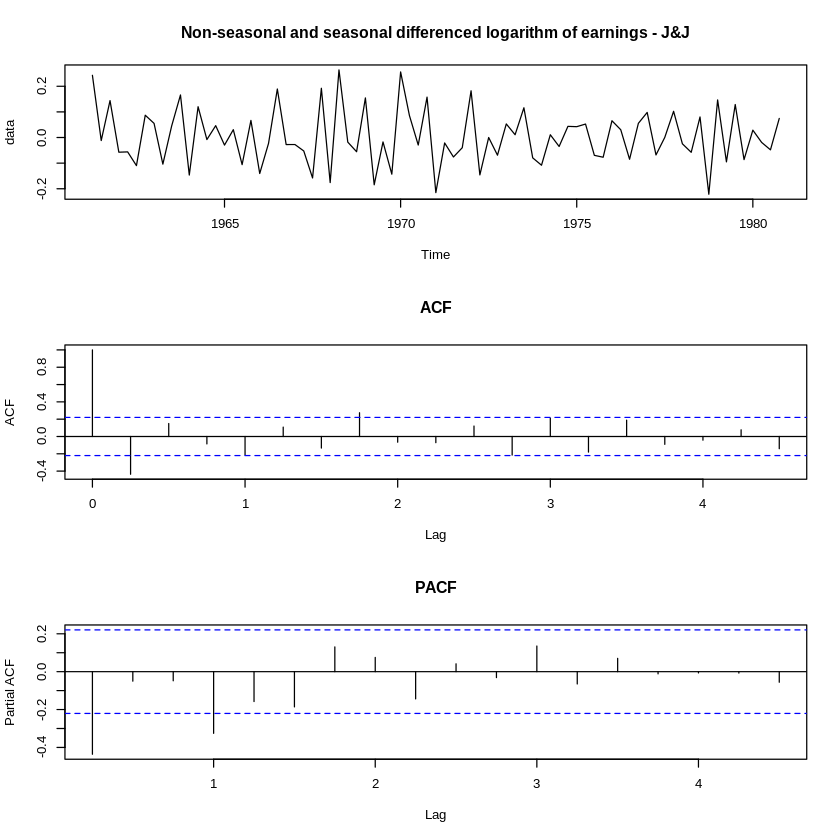

In [21]:
# ACF, PACF 확인
par(mfcol=c(3,1))
plot(data, main='Non-seasonal and seasonal differenced logarithm of earnings - J&J')
acf(data, main='ACF')
acf(data, type='partial', main='PACF')

- ACF → $q=0,1$ ;  $Q=0,1 $
- PACF → $p=0,1$ ; $P=0,1$
- 따라서, $log(jj)$에 대해서 $SARIMA(p,1,q,P,1,Q)_4$ 모델 도출
- R 코드 : ```arima( x=log(jj), order=c(p,1,q), seasonal=list(order=c(P,1,Q),period=4) )```

In [11]:
# 여기서 p-value가 설명하는 귀무가설은 '잔차에 대해 앞선 lag와 autocorrelation이 없다'이므로 p-value가 커야함

d=1
DD=1

per=4

for(p in 1:2){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:2){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=log(jj), order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}




0 1 0 0 1 0 4 AIC= -124.0685  SSE= 0.9377871  p-VALUE= 0.0002610795 
0 1 0 0 1 1 4 AIC= -126.3493  SSE= 0.8856994  p-VALUE= 0.0001606542 
0 1 0 1 1 0 4 AIC= -125.9198  SSE= 0.8908544  p-VALUE= 0.0001978052 
0 1 0 1 1 1 4 AIC= -124.3648  SSE= 0.8854554  p-VALUE= 0.000157403 
0 1 1 0 1 0 4 AIC= -145.5139  SSE= 0.6891988  p-VALUE= 0.03543717 
0 1 1 0 1 1 4 AIC= -150.7528  SSE= 0.6265214  p-VALUE= 0.6089542 
0 1 1 1 1 0 4 AIC= -150.9134  SSE= 0.6251634  p-VALUE= 0.707918 
0 1 1 1 1 1 4 AIC= -149.1317  SSE= 0.6232876  p-VALUE= 0.6780876 
1 1 0 0 1 0 4 AIC= -139.8248  SSE= 0.7467494  p-VALUE= 0.03503386 
1 1 0 0 1 1 4 AIC= -146.0191  SSE= 0.6692691  p-VALUE= 0.5400176 
1 1 0 1 1 0 4 AIC= -146.0319  SSE= 0.6689661  p-VALUE= 0.5612964 
1 1 0 1 1 1 4 AIC= -144.3766  SSE= 0.6658382  p-VALUE= 0.5459445 
1 1 1 0 1 0 4 AIC= -145.8284  SSE= 0.667109  p-VALUE= 0.2200484 
1 1 1 0 1 1 4 AIC= -148.7706  SSE= 0.6263677  p-VALUE= 0.594822 
1 1 1 1 1 0 4 AIC= -148.9175  SSE= 0.6251104  p-VALUE= 0.719547 
1

=> AIC가 최소이고 p-value가 큰 (0,1,1,1,1,0)_4 선택

In [24]:
# 최종 모델 - 방법1

arima(x=log(jj), order = c(0,1,1), seasonal = list(order=c(1,1,0), period=4))


Call:
arima(x = log(jj), order = c(0, 1, 1), seasonal = list(order = c(1, 1, 0), period = 4))

Coefficients:
          ma1     sar1
      -0.6796  -0.3220
s.e.   0.0969   0.1124

sigma^2 estimated as 0.007913:  log likelihood = 78.46,  aic = -150.91

initial  value -2.237259 
iter   2 value -2.429075
iter   3 value -2.446738
iter   4 value -2.455821
iter   5 value -2.459761
iter   6 value -2.462511
iter   7 value -2.462602
iter   8 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
final  value -2.462749 
converged
initial  value -2.411490 
iter   2 value -2.412022
iter   3 value -2.412060
iter   4 value -2.412062
iter   4 value -2.412062
iter   4 value -2.412062
final  value -2.412062 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    include.mean = !no.constant, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
        REPORT = 1, reltol = tol))

Coefficients:
          ma1     sar1
      -0.6796  -0.3220
s.e.   0.0969   0.1124

sigma^2 estimated as 0.007913:  log likelihood = 78.46,  aic = -150.91

$degrees_of_freedom
[1] 77

$ttable
     Estimate     SE t.value p.value
ma1   -0.6796 0.0969 -7.0104  0.0000
sar1  -0.3220 0.1124 -2.8641  0.0054

$AIC
[1] -1.910297

$AICc
[1] -1.908298

$BIC
[1] -1.820318


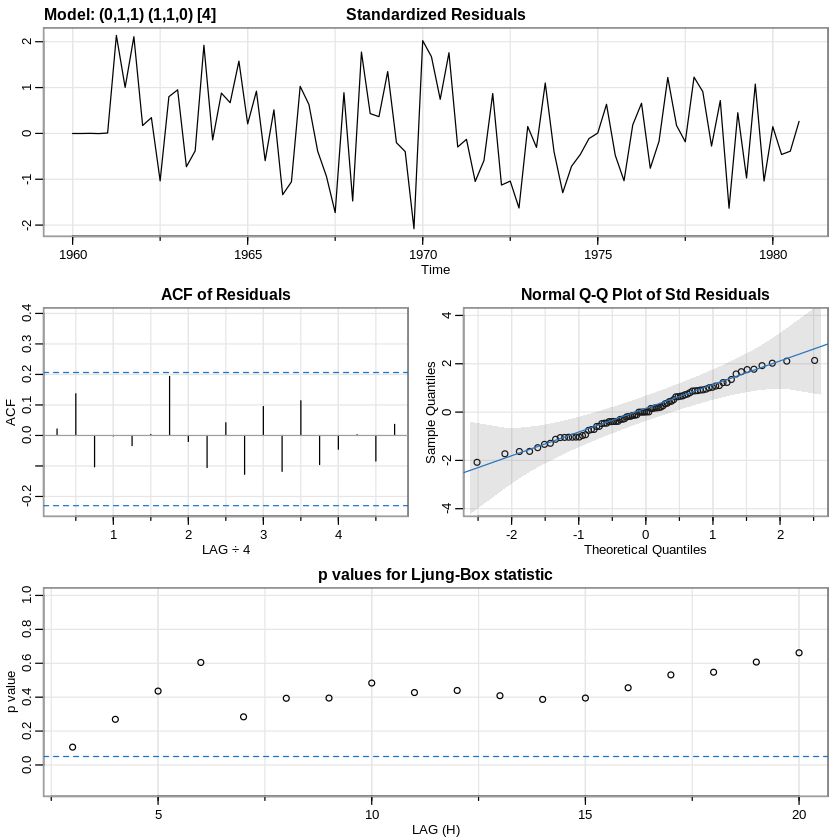

In [22]:
# 최종 모델 - 방법2

sarima(log(jj), 0,1,1,1,1,0,4)

In [ ]:
# Forecast

install.packages('forecast')

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




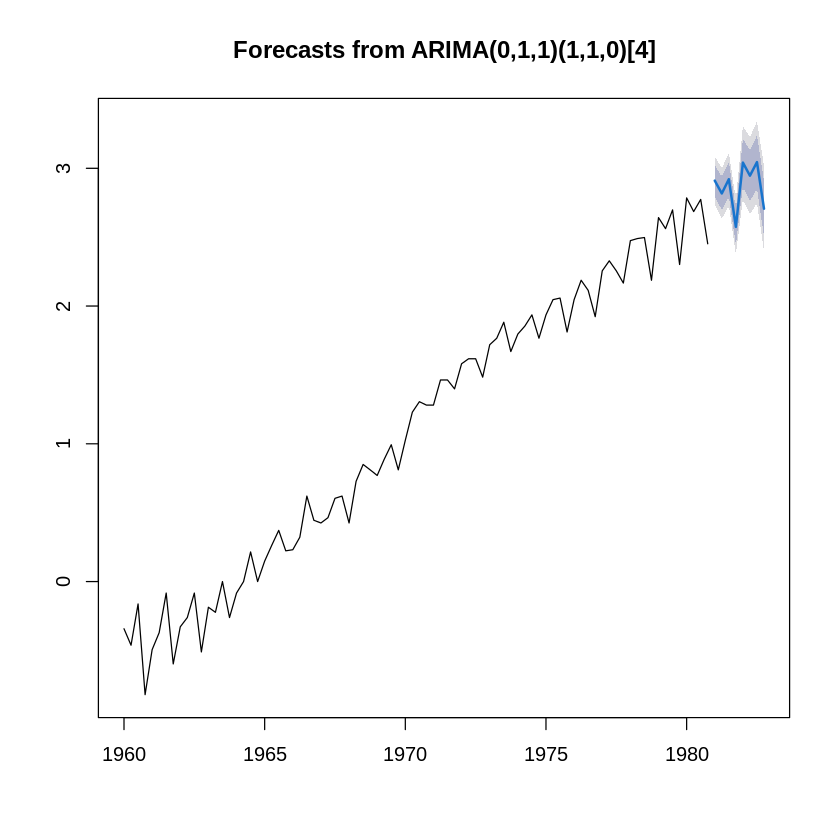

In [27]:
require(forecast)
model<-arima(x=log(jj), order = c(0,1,1), seasonal = list(order=c(1,1,0), period=4))
plot(forecast(model))